In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
data = pd.read_csv("C:\\Users\\sneka\\Downloads\\sales_data_1.csv")

In [3]:
#Getting the first 5 rows of the dataset, to get a look about the dataset
data.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


In [4]:
#Getting dimension of the dataset
data.shape

(70, 6)

In [5]:
#The columns in the dataset
data.columns

Index(['Date', 'Firm bought from', 'Buying price', 'Customer', 'Selling price',
       'Quantity sold'],
      dtype='object')

In [6]:
#Checking for null values in the dataset
dataset = data.isnull().sum()
dataset

Date                0
Firm bought from    0
Buying price        0
Customer            0
Selling price       0
Quantity sold       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              70 non-null     object 
 1   Firm bought from  70 non-null     object 
 2   Buying price      70 non-null     float64
 3   Customer          70 non-null     object 
 4   Selling price     70 non-null     float64
 5   Quantity sold     70 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ KB


In [8]:
data.describe()

,Buying price,Selling price,Quantity sold
count,70.000000,70.000000,70.000000
mean,56.667571,73.913286,24.242857
std,27.520992,37.990807,22.174169
min,10.190000,11.650000,1.000000
25%,29.900000,38.975000,7.000000
50%,60.760000,78.990000,17.500000
75%,78.320000,103.397500,38.500000
max,99.230000,146.760000,92.000000


In [9]:
# Calculating the profit from the dataset
data['Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month 
data['Year'] = data['Date'].dt.year
data['Day_of_Week'] = data['Date'].dt.day_name()

In [11]:
data.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Profit,Month,Year,Day_of_Week
0,2023-08-21,Vendor6,72.11,Customer7,91.58,44,856.68,8,2023,Monday
1,2023-08-21,Vendor4,75.08,Customer7,83.71,17,146.71,8,2023,Monday
2,2023-08-21,Vendor7,83.93,Customer2,103.76,15,297.45,8,2023,Monday
3,2023-08-21,Vendor7,52.01,Customer3,64.53,7,87.64,8,2023,Monday
4,2023-08-21,Vendor2,98.91,Customer5,140.92,1,42.01,8,2023,Monday


In [12]:
data.describe()

,Buying price,Selling price,Quantity sold,Profit,Month,Year
count,70.000000,70.000000,70.000000,70.000000,70.0,70.0
mean,56.667571,73.913286,24.242857,449.753571,8.0,2023.0
std,27.520992,37.990807,22.174169,667.529305,0.0,0.0
min,10.190000,11.650000,1.000000,4.470000,8.0,2023.0
25%,29.900000,38.975000,7.000000,79.245000,8.0,2023.0
50%,60.760000,78.990000,17.500000,179.160000,8.0,2023.0
75%,78.320000,103.397500,38.500000,552.760000,8.0,2023.0
max,99.230000,146.760000,92.000000,3016.300000,8.0,2023.0


1. What is their overall gross margin for their business

In [60]:
COGS = data['Buying price'] * data['Quantity sold'] 

In [61]:
#COGS.head()

In [62]:
COGS.sum()

96321.56000000001

In [63]:
Revenue = data['Selling price'] * data['Quantity sold']

In [64]:
total_cogs = COGS.sum()
total_revenue = Revenue.sum()

In [65]:
total_cogs

96321.56000000001

In [66]:
total_revenue

127804.31

In [67]:
gross_margin = (total_revenue - total_cogs) / total_revenue
gross_margin

0.24633558915188375

2. Which vendor is the most profitable?

In [48]:
# Group by vendors and sum their profits
vendor_profit = data.groupby('Firm bought from')['Profit'].sum()

In [49]:
# Find the most profitable vendor
most_profitable_vendor = vendor_profit.idxmax()
most_profitable_vendor

'Vendor4'

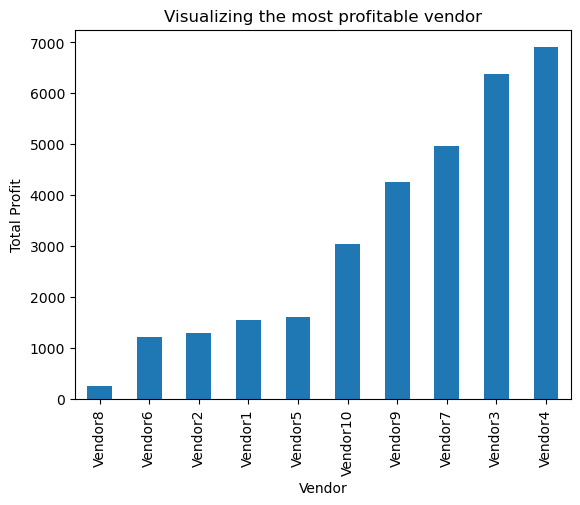

In [50]:

vendor_profit.sort_values().plot(kind='bar')
plt.title('Visualizing the most profitable vendor')
plt.xlabel('Vendor')
plt.ylabel('Total Profit')
plt.show()

3. Which customer is the least profitable

In [44]:
# Group by vendors and sum their profits
customer_profit = data.groupby('Customer')['Profit'].sum()

In [45]:
# Find the most profitable vendor
least_profitable_vendor = customer_profit.idxmin()
least_profitable_vendor

'Customer3'

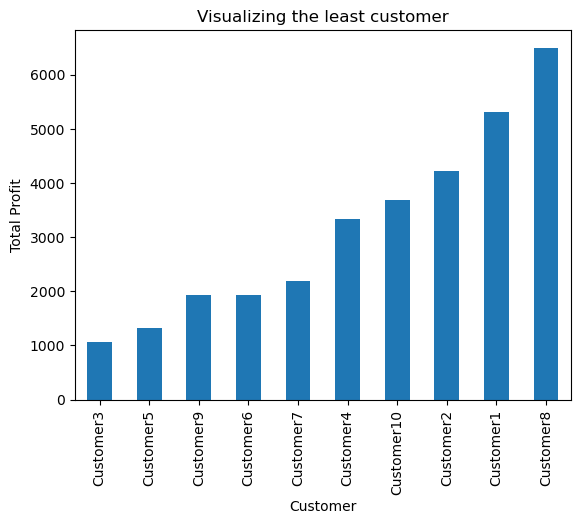

In [46]:
customer_profit.sort_values().plot(kind='bar')
plt.title('Visualizing the least customer')
plt.xlabel('Customer')
plt.ylabel('Total Profit')
plt.show()


4 and 5. Which day of the week was most profitable & least profitable for them

In [55]:
# Group the data by the day of the week and calculate the total profit for each day
day_profit = data.groupby('Day_of_Week')['Profit'].sum()

In [56]:
# Find the day of the week with the highest total profit
most_profitable_day = day_profit.idxmax()
most_profitable_day

'Monday'

In [57]:
least_profitable_day = day_profit.idxmin()
least_profitable_day

'Sunday'

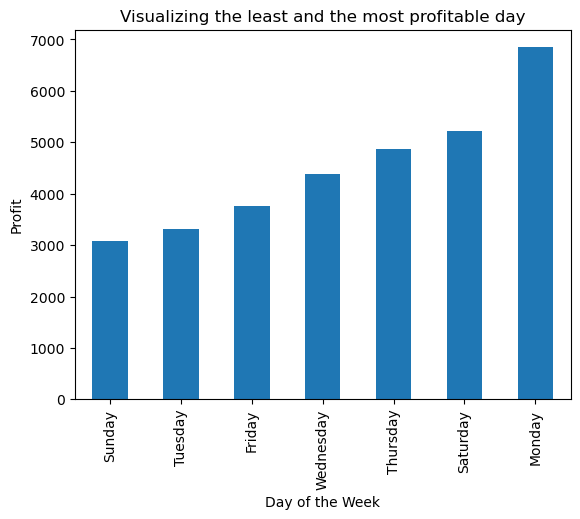

In [59]:
day_profit.sort_values().plot(kind='bar')
plt.title('Visualizing the least and the most profitable day')
plt.xlabel('Day of the Week')
plt.ylabel('Profit')
plt.show()